In [49]:
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.ignis.verification import marginal_counts
from qiskit.quantum_info import random_statevector
from qiskit.visualization import plot_bloch_multivector
from mpl_toolkits.mplot3d import Axes3D



<IPython.core.display.Latex object>

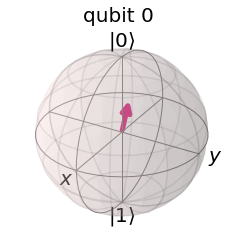

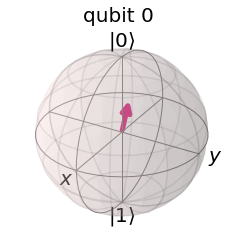

In [50]:
# Create random 1-qubit state
psi = random_statevector(2)
init_gate = Initialize(psi)
init_gate.label = "init"

# Display it nicely
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
# Show it on a Bloch sphere
plot_bloch_multivector(psi)

In [51]:
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target

In [52]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

In [53]:
def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

In [54]:
# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'

In [55]:
## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
qc.h(1) # Put qubit a into state |+>
qc.cx(1,2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
qc.cx(0, 1)
qc.h(0)

## STEP 3
# Alice then sends her classical bits to Bob
qc.barrier()
qc.measure(0,0)
qc.measure(1,1)

## STEP 4
# Bob decodes qubits
qc.x(2).c_if(crx, 1) # Apply gates if the registers 
qc.z(2).c_if(crz, 1) 

# Display the circuit
qc.draw()

┌───────────────────────────────────────────┐ ░            ░      ┌───┐»
  q_0: ┤ init(0.057212+0.94321j,-0.18433+0.27039j) ├─░────────────░───■──┤ H ├»
       └───────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘»
  q_1: ──────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├─────»
                                                     ░ └───┘┌─┴─┐ ░ └───┘     »
  q_2: ──────────────────────────────────────────────░──────┤ X ├─░───────────»
                                                     ░      └───┘ ░           »
crz: 1/═══════════════════════════════════════════════════════════════════════»
                                                                              »
crx: 1/═══════════════════════════════════════════════════════════════════════»
                                                                              »
«        ░ ┌─┐                 
«  q_0: ─░─┤M├─────────────────
«        ░ └╥┘┌─┐              
«  q_1: ─░──╫─┤M├──────────────
«        ░  ║ └╥┘ ┌───┐  ┌───┐ 
«  q_2: ─░──╫──╫──┤ X ├──┤ Z ├─
«        ░  ║  ║  └─╥─┘  └─╥─┘ 
«           ║  ║    ║   ┌──╨──┐
«crz: 1/════╩══╬════╬═══╡ = 1 ╞
«           0  ║ ┌──╨──┐└─────┘
«crx: 1/═══════╩═╡ = 1 ╞═══════
«              0 └─────┘

In [56]:
# execute the quantum circuit
backend = Aer.get_backend('qasm_simulator') # the device to run on
result = execute(qc, backend, shots=1000).result()
counts  = result.get_counts(qc)
print(counts)

{'1 0': 253, '0 0': 243, '1 1': 261, '0 1': 243}


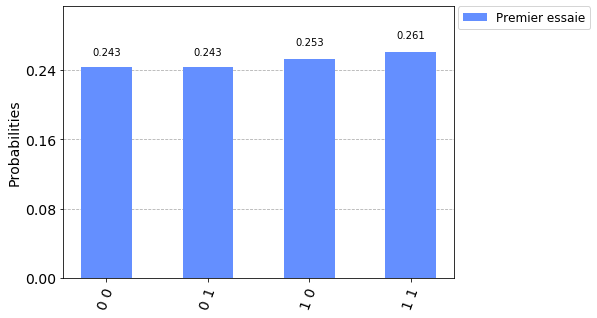

In [57]:
from qiskit.visualization import plot_histogram

hist = plot_histogram([counts], legend=['Premier essaie'])

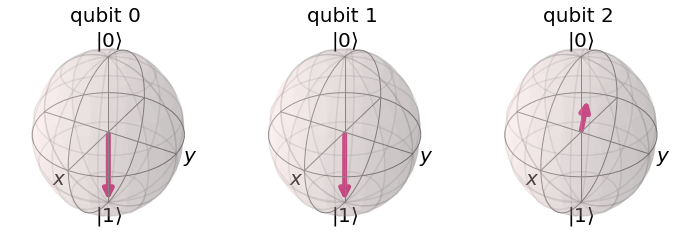

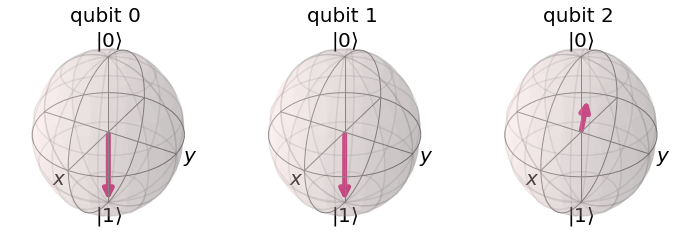

In [58]:


sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)

In [59]:
q = QuantumRegister(2, name='q') 
c = ClassicalRegister(2) 
circuit = QuantumCircuit(q, c)

In [60]:
from qiskit.tools.monitor import job_monitor 
from qiskit.visualization import plot_histogram
IBMQ.save_account('3494ab5b24ce8823b9501d362fb9ef9685afa2063c69ae163d28bb02f8dc6ee0be0905bc739e66c3c3fabff7efdbf7b67ae2177e5bb01f0d4f0bea7aed8b241d')
IBMQ.load_account() 
IBMQ.providers() 
provider = IBMQ.get_provider('ibm-q') 
provider.backends() 
qcomp = provider.get_backend('ibmq_belem') 
job = execute(circuit, backend=qcomp) 

job_monitor(job) 

result_hard = job.result() 

plot_histogram(result_hard.get_counts(circuit))

configrc.store_credentials:WARNING:2021-10-22 22:53:39,570: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2021-10-22 22:53:40,867: Credentials are already in use. The existing account in the session will be replaced.


KeyboardInterrupt: 